In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [26]:
k_AB, k_BA = sp.symbols('k_AB k_BA')
k_BC, k_CB = sp.symbols('k_BC k_CB')
k_CA, k_AC = sp.symbols('k_CA k_AC')
k_DA, k_AD = sp.symbols('k_DA k_AD')
#pA, pB, pC = 0.5, 0.3, 0.2
pA, pB, pC, pD = sp.symbols('pA pB pC pD')

In [27]:
eq1 = sp.Eq(-(k_AB + k_AC) * pA + k_BA * pB + k_CA * pC, 0)
eq2 = sp.Eq(-(k_BA + k_BC) * pB + k_AB * pA + k_CB * pC, 0)
eq3 = sp.Eq(-(k_CA + k_CB) * pC + k_AC * pA + k_BC * pB, 0)
eq4 = sp.Eq(pA+pB+pC, 1)

In [28]:
# Substitute values for all k's except k_BC and k_CB
subs_dict = {
    k_AB: 1.0,
    k_AC: 2.0,
    k_BA: 1.5,
    k_CA: 1.2
}

eq1_subs = eq1.subs(subs_dict)
eq2_subs = eq2.subs(subs_dict)
eq3_subs = eq3.subs(subs_dict)


In [29]:
solution = sp.solve(
    [eq1_subs, eq2_subs, eq3_subs, eq4],
    [pA, pB, pC],
    dict=True
)

In [30]:
solution

[{pA: (4.0*k_BC + 5.0*k_CB + 6.0)/(14.0*k_BC + 15.0*k_CB + 20.0),
  pB: (10.0*k_CB + 4.0)/(14.0*k_BC + 15.0*k_CB + 20.0),
  pC: (10.0*k_BC + 10.0)/(14.0*k_BC + 15.0*k_CB + 20.0)}]

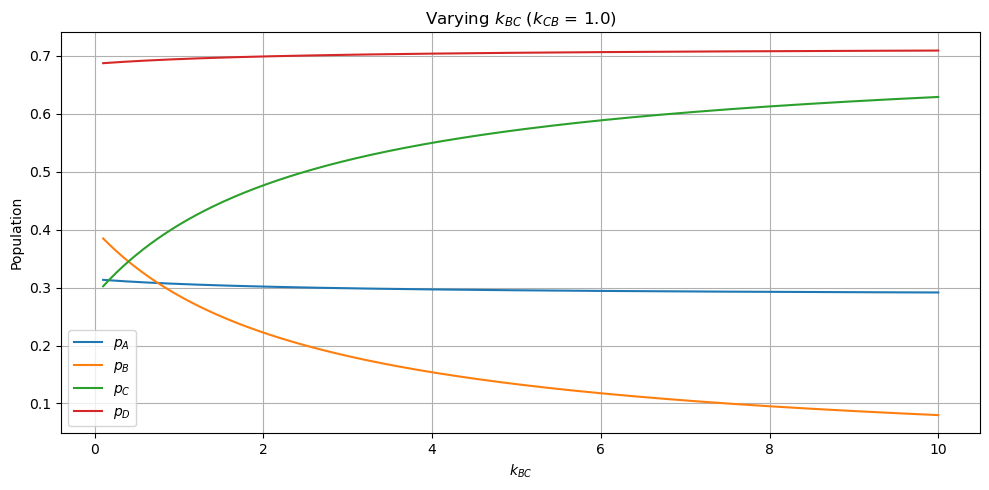

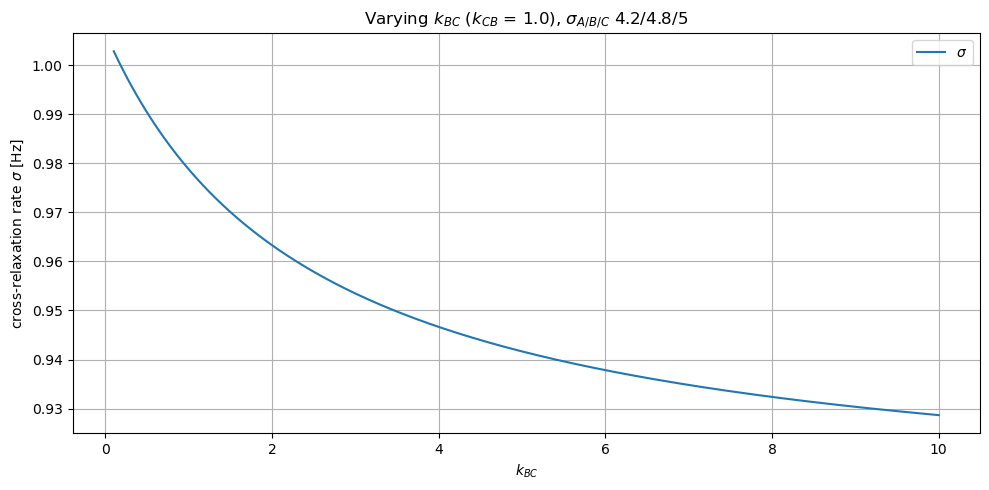

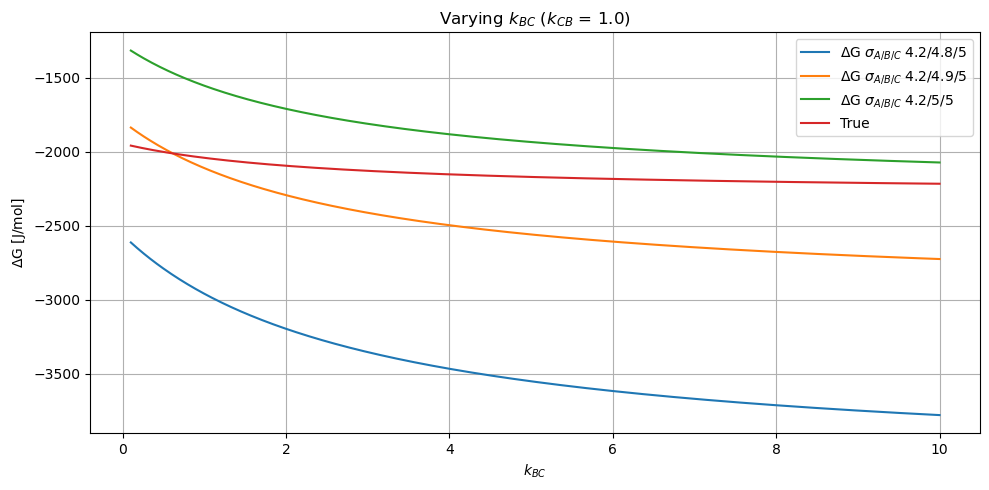

In [31]:
# plot cyclic reaction with varying k_BC, k_CB
# Constants
k_CB_const = 1.0  # Fixed value for k_CB when varying k_BC
k_BC_const = 1.0  # Fixed value for k_BC when varying k_CB

# Range for k_BC and k_CB
k_range = np.linspace(0.1, 10, 500)

def sig(pA, pB, pC, sigA, sigB, sigC):
    return pA*sigA + pB*sigB + pC*sigC

# Functions for pA, pB, pC
def compute_probs(k_BC, k_CB):
    denominator = 14.0 * k_BC + 15.0 * k_CB + 20.0
    pA = (4.0 * k_BC + 5.0 * k_CB + 6.0) / denominator
    pB = (10.0 * k_CB + 4.0) / denominator
    pC = (10.0 * k_BC + 10.0) / denominator
    return pA, pB, pC

# First plot: vary k_BC
pA_vals, pB_vals, pC_vals = [], [], []
for k_BC in k_range:
    pA, pB, pC = compute_probs(k_BC, k_CB_const)
    pA_vals.append(pA)
    pB_vals.append(pB)
    pC_vals.append(pC)


pA_vals = np.asarray(pA_vals)
pB_vals = np.asarray(pB_vals)
pC_vals = np.asarray(pC_vals)

plt.figure(figsize=(10, 5))
plt.plot(k_range, pA_vals, label=r'$p_A$')
plt.plot(k_range, pB_vals, label=r'$p_B$')
plt.plot(k_range, pC_vals, label=r'$p_C$')
plt.plot(k_range, pC_vals+pB_vals, label=r'$p_D$')
plt.title(r'Varying $k_{BC}$ ($k_{CB}$ = 1.0)')
plt.xlabel(r'$k_{BC}$')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("pop_v_kBC.pdf", format='pdf')
plt.show()



sigA=(1/(4.2e-10)**6)*(9.29930755e-57)
sigB=(1/(4.8e-10)**6)*(9.29930755e-57)
sigC=(1/(5e-10)**6)*(9.29930755e-57)
sig_BC = sig(pA_vals,pB_vals,pC_vals, sigA, sigB, sigC)

plt.figure(figsize=(10, 5))
plt.plot(k_range, sig_BC, label=r'$\sigma$')
plt.title(r'Varying $k_{BC}$ ($k_{CB}$ = 1.0), $\sigma_{A/B/C}$ 4.2/4.8/5')
plt.xlabel('$k_{BC}$')
plt.ylabel(r'cross-relaxation rate $\sigma$ [Hz]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sig_v_kBC.pdf", format='pdf')
plt.show()

def dG(sigA0, sigB0, sigT):
    return -8.314*300*np.log((sigA0-sigT)/(sigT-sigB0))


sig49 = 1/(4.9e-10)**6*(9.29930755e-57)
sig5 = 1/(5e-10)**6*(9.29930755e-57)

plt.figure(figsize=(10, 5))
plt.plot(k_range, dG(sigA, sigB, sig_BC), label=r'$\Delta$G $\sigma_{A/B/C}$ 4.2/4.8/5')
plt.plot(k_range, dG(sigA, sig49, sig_BC), label=r'$\Delta$G $\sigma_{A/B/C}$ 4.2/4.9/5')
plt.plot(k_range, dG(sigA, sig5, sig_BC), label=r'$\Delta$G $\sigma_{A/B/C}$ 4.2/5/5')
plt.plot(k_range, -8.314*300*np.log((pB_vals+pC_vals)/pA_vals), label=r'True')
plt.title(r'Varying $k_{BC}$ ($k_{CB}$ = 1.0)')
plt.xlabel(r'$k_{BC}$')
plt.ylabel(r'$\Delta$G [J/mol]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("dG_v_kBC.pdf", format='pdf')
plt.show()

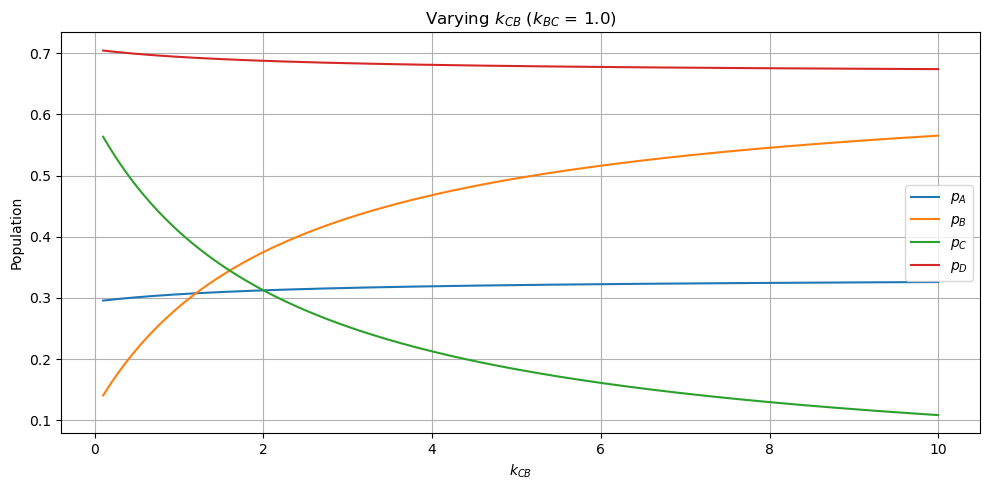

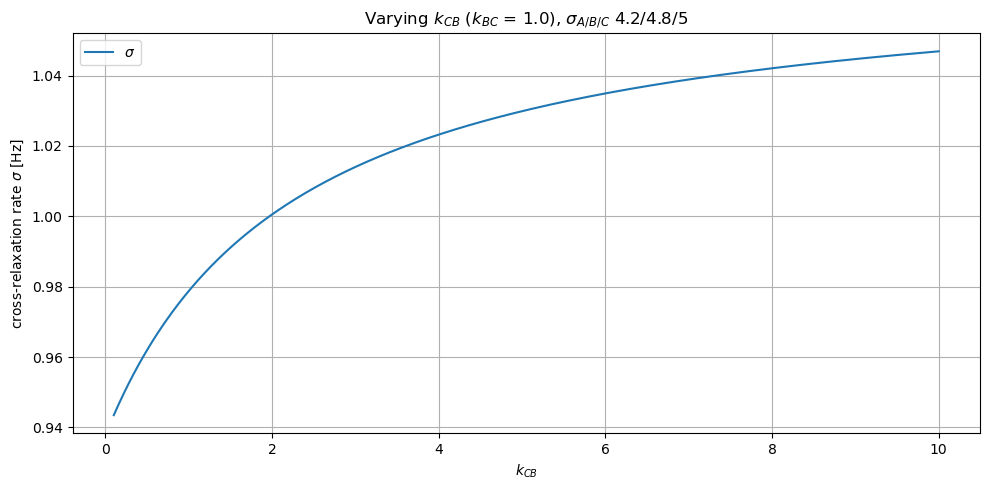

C:\Users\C9Wol\AppData\Local\Temp\ipykernel_22192\1114411757.py:42: RuntimeWarning: divide by zero encountered in divide
  return -8.314*300*np.log((sigA0-sigT)/(sigT-sigB0))
C:\Users\C9Wol\AppData\Local\Temp\ipykernel_22192\1114411757.py:42: RuntimeWarning: invalid value encountered in log
  return -8.314*300*np.log((sigA0-sigT)/(sigT-sigB0))


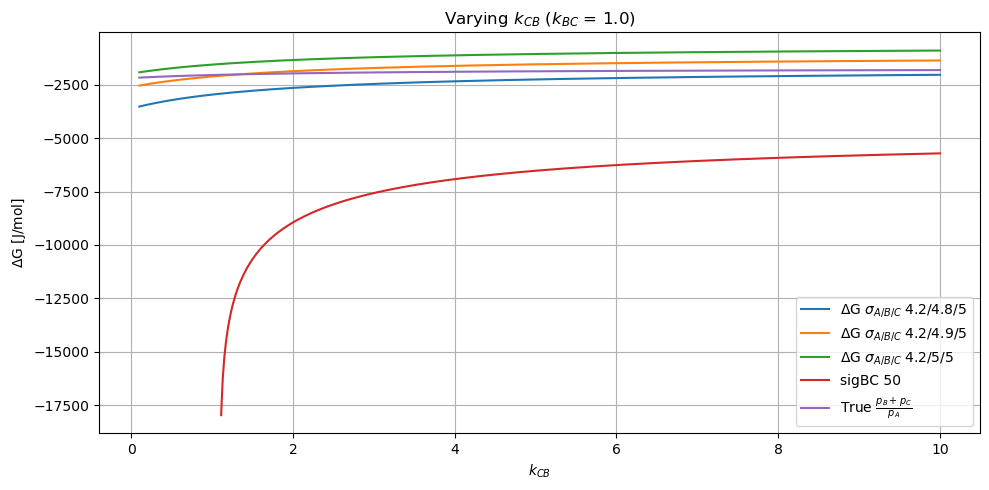

In [32]:
# Second plot: vary k_CB
pA_vals, pB_vals, pC_vals = [], [], []
for k_CB in k_range:
    pA, pB, pC = compute_probs(k_BC_const, k_CB)
    pA_vals.append(pA)
    pB_vals.append(pB)
    pC_vals.append(pC)

pA_vals = np.asarray(pA_vals)
pB_vals = np.asarray(pB_vals)
pC_vals = np.asarray(pC_vals)

plt.figure(figsize=(10, 5))
plt.plot(k_range, pA_vals, label=r'$p_A$')
plt.plot(k_range, pB_vals, label=r'$p_B$')
plt.plot(k_range, pC_vals, label=r'$p_C$')
plt.plot(k_range, pC_vals+pB_vals, label=r'$p_D$')
plt.title(r'Varying $k_{CB}$ ($k_{BC}$ = 1.0)')
plt.xlabel(r'$k_{CB}$')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("pop_v_kCB.pdf", format='pdf')
plt.show()


sig_BC = sig(pA_vals,pB_vals,pC_vals, sigA, sigB, sigC)

plt.figure(figsize=(10, 5))
plt.plot(k_range, sig_BC, label=r'$\sigma$')
plt.title(r'Varying $k_{CB}$ ($k_{BC}$ = 1.0), $\sigma_{A/B/C}$ 4.2/4.8/5')
plt.xlabel(r'$k_{CB}$')
plt.ylabel(r'cross-relaxation rate $\sigma$ [Hz]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sig_CB.pdf", format='pdf')
plt.show()

def dG(sigA0, sigB0, sigT):
    return -8.314*300*np.log((sigA0-sigT)/(sigT-sigB0))


plt.figure(figsize=(10, 5))
plt.plot(k_range, dG(sigA, sigB, sig_BC), label=r'$\Delta$G $\sigma_{A/B/C}$ 4.2/4.8/5')
plt.plot(k_range, dG(sigA, sig49, sig_BC), label=r'$\Delta$G $\sigma_{A/B/C}$ 4.2/4.9/5')
plt.plot(k_range, dG(sigA, sig5, sig_BC), label=r'$\Delta$G $\sigma_{A/B/C}$ 4.2/5/5')
#plt.plot(k_range, dG(sigA, sig_BC[50], sig_BC), label=r'sigBC 50')
plt.plot(k_range, -8.314*300*np.log((pB_vals+pC_vals)/pA_vals), label=r'True $\frac{p_B+p_C}{p_A}$')
plt.title(r'Varying $k_{CB}$ ($k_{BC}$ = 1.0)')
plt.xlabel(r'$k_{CB}$')
plt.ylabel(r'$\Delta$G [J/mol]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("dG_v_kCB.pdf", format='pdf')
plt.show()

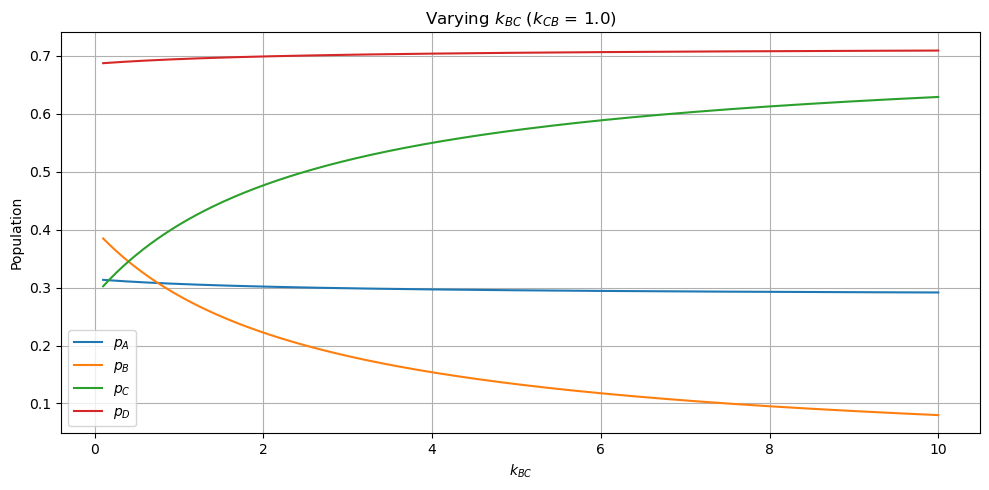

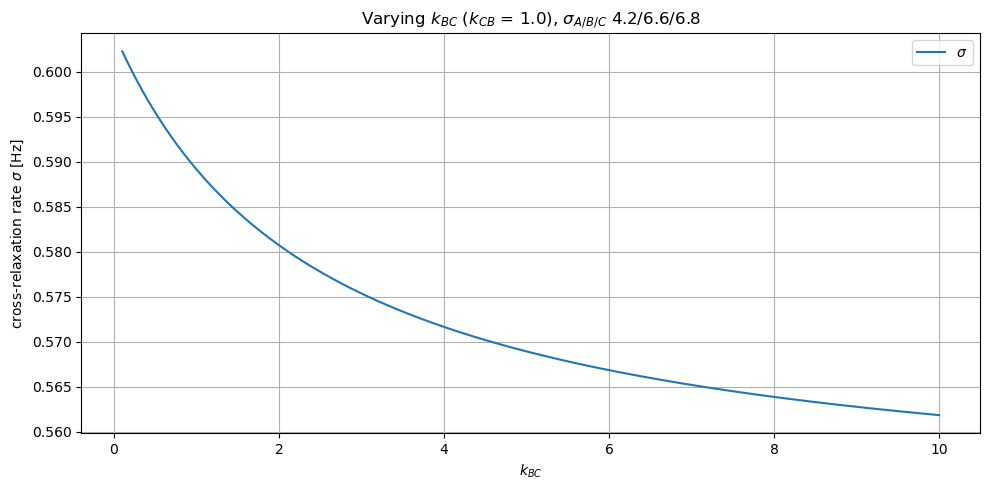

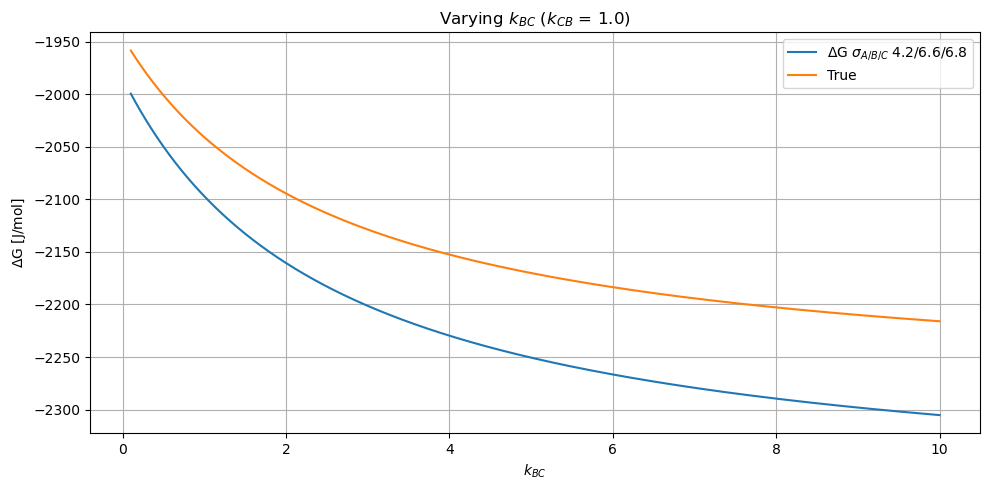

In [33]:
# same thing for different crr

# plot cyclic reaction with varying k_BC, k_CB
# Constants
k_CB_const = 1.0  # Fixed value for k_CB when varying k_BC
k_BC_const = 1.0  # Fixed value for k_BC when varying k_CB

# Range for k_BC and k_CB
k_range = np.linspace(0.1, 10, 500)

def sig(pA, pB, pC, sigA, sigB, sigC):
    return pA*sigA + pB*sigB + pC*sigC

# Functions for pA, pB, pC
def compute_probs(k_BC, k_CB):
    denominator = 14.0 * k_BC + 15.0 * k_CB + 20.0
    pA = (4.0 * k_BC + 5.0 * k_CB + 6.0) / denominator
    pB = (10.0 * k_CB + 4.0) / denominator
    pC = (10.0 * k_BC + 10.0) / denominator
    return pA, pB, pC

# First plot: vary k_BC
pA_vals, pB_vals, pC_vals = [], [], []
for k_BC in k_range:
    pA, pB, pC = compute_probs(k_BC, k_CB_const)
    pA_vals.append(pA)
    pB_vals.append(pB)
    pC_vals.append(pC)


pA_vals = np.asarray(pA_vals)
pB_vals = np.asarray(pB_vals)
pC_vals = np.asarray(pC_vals)

plt.figure(figsize=(10, 5))
plt.plot(k_range, pA_vals, label=r'$p_A$')
plt.plot(k_range, pB_vals, label=r'$p_B$')
plt.plot(k_range, pC_vals, label=r'$p_C$')
plt.plot(k_range, pC_vals+pB_vals, label=r'$p_D$')
plt.title(r'Varying $k_{BC}$ ($k_{CB}$ = 1.0)')
plt.xlabel(r'$k_{BC}$')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("populations_BC.pdf", format='pdf')
plt.show()



sigA=1/(4.2e-10)**6*(9.29930755e-57)
sigB=1/(6.6e-10)**6*(9.29930755e-57)
sigC=1/(6.8e-10)**6*(9.29930755e-57)
sig_BC = sig(pA_vals,pB_vals,pC_vals, sigA, sigB, sigC)

plt.figure(figsize=(10, 5))
plt.plot(k_range, sig_BC, label=r'$\sigma$')
plt.title(r'Varying $k_{BC}$ ($k_{CB}$ = 1.0), $\sigma_{A/B/C}$ 4.2/6.6/6.8')
plt.xlabel(r'$k_{BC}$')
plt.ylabel(r'cross-relaxation rate $\sigma$ [Hz]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sigma_v_kBC_higher_sig.pdf", format='pdf')
plt.show()

def dG(sigA0, sigB0, sigT):
    return -8.314*300*np.log((sigA0-sigT)/(sigT-sigB0))


plt.figure(figsize=(10, 5))
plt.plot(k_range, dG(sigA, sigB, sig_BC), label=r'$\Delta$G $\sigma_{A/B/C}$ 4.2/6.6/6.8')
plt.plot(k_range, -8.314*300*np.log((pB_vals+pC_vals)/pA_vals), label='True')
plt.title(r'Varying $k_{BC}$ ($k_{CB}$ = 1.0)')
plt.xlabel(r'$k_{BC}$')
plt.ylabel(r'$\Delta$G [J/mol]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("dG_v_kBC_higher_sig.pdf", format='pdf')
plt.show()






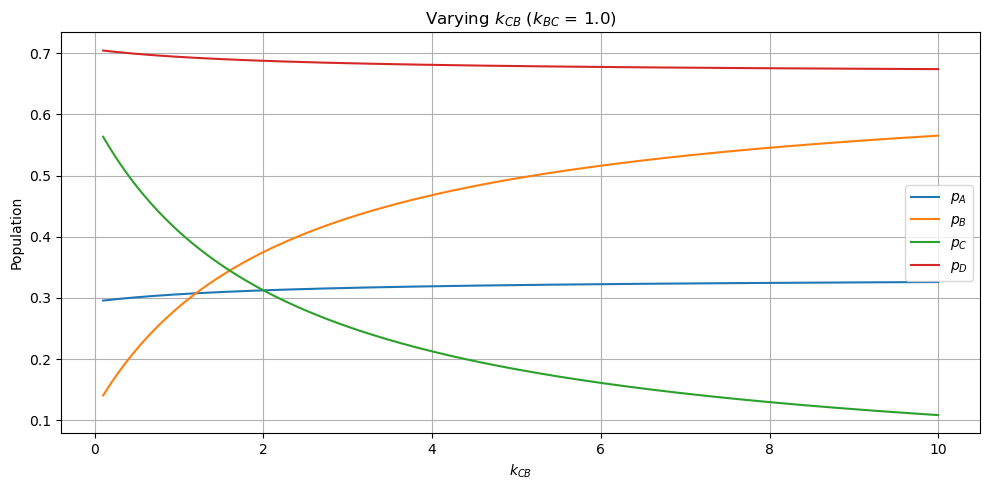

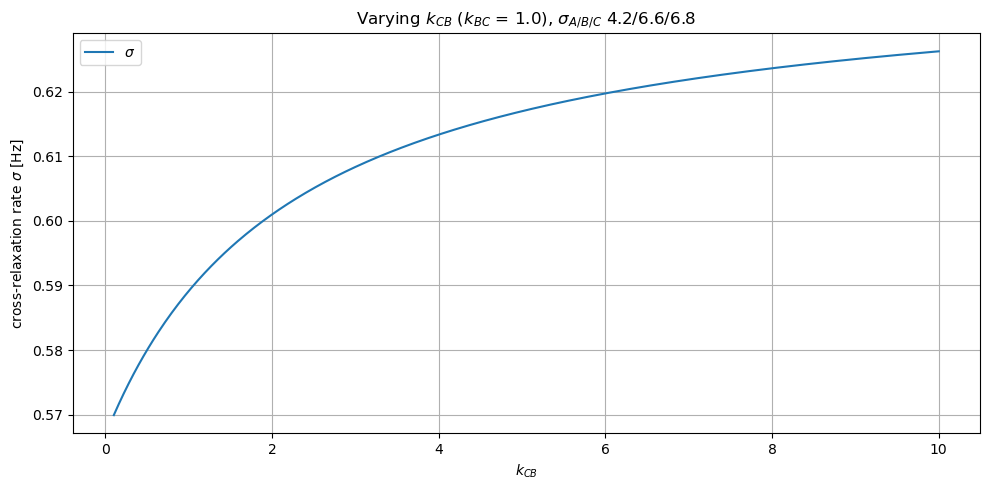

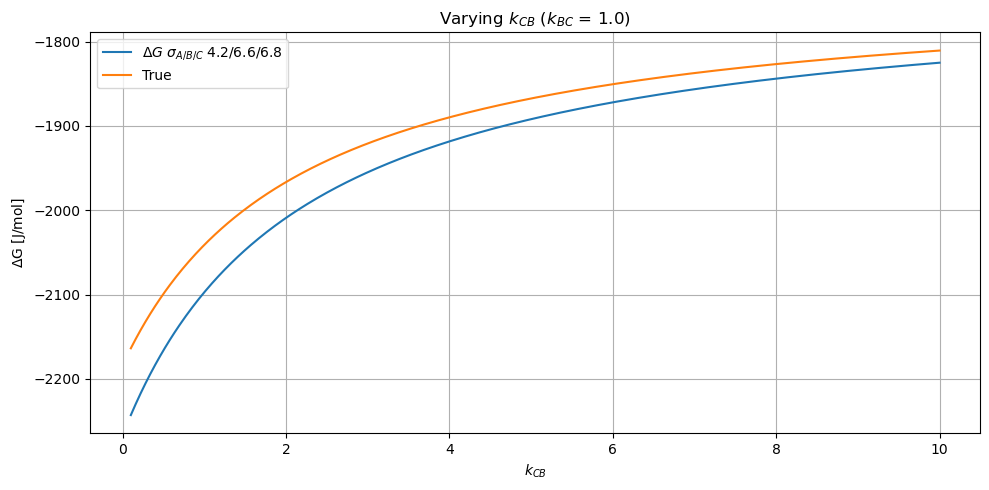

In [34]:
# Second plot: vary k_CB
pA_vals, pB_vals, pC_vals = [], [], []
for k_CB in k_range:
    pA, pB, pC = compute_probs(k_BC_const, k_CB)
    pA_vals.append(pA)
    pB_vals.append(pB)
    pC_vals.append(pC)

pA_vals = np.asarray(pA_vals)
pB_vals = np.asarray(pB_vals)
pC_vals = np.asarray(pC_vals)

plt.figure(figsize=(10, 5))
plt.plot(k_range, pA_vals, label=r'$p_A$')
plt.plot(k_range, pB_vals, label=r'$p_B$')
plt.plot(k_range, pC_vals, label=r'$p_C$')
plt.plot(k_range, pC_vals+pB_vals, label=r'$p_D$')
plt.title(r'Varying $k_{CB}$ ($k_{BC}$ = 1.0)')
plt.xlabel(r'$k_{CB}$')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("pops_cb_higher.pdf", format='pdf')
plt.show()

sig_BC = sig(pA_vals,pB_vals,pC_vals, sigA, sigB, sigC)

plt.figure(figsize=(10, 5))
plt.plot(k_range, sig_BC, label=r'$\sigma$')
plt.title(r'Varying $k_{CB}$ ($k_{BC}$ = 1.0), $\sigma_{A/B/C}$ 4.2/6.6/6.8')
plt.xlabel(r'$k_{CB}$')
plt.ylabel(r'cross-relaxation rate $\sigma$ [Hz]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sigma_v_kCB_higher_sig.pdf", format='pdf')
plt.show()

def dG(sigA0, sigB0, sigT):
    return -8.314*300*np.log((sigA0-sigT)/(sigT-sigB0))


plt.figure(figsize=(10, 5))
plt.plot(k_range, dG(sigA, sigB, sig_BC), label=r'$\Delta G$ $\sigma_{A/B/C}$ 4.2/6.6/6.8')
plt.plot(k_range, -8.314*300*np.log((pB_vals+pC_vals)/pA_vals), label='True')
plt.title(r'Varying $k_{CB}$ ($k_{BC}$ = 1.0)')
plt.xlabel(r'$k_{CB}$')
plt.ylabel(r'$\Delta$G [J/mol]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("dG_v_kCB_higher_sig.pdf", format='pdf')
plt.show()

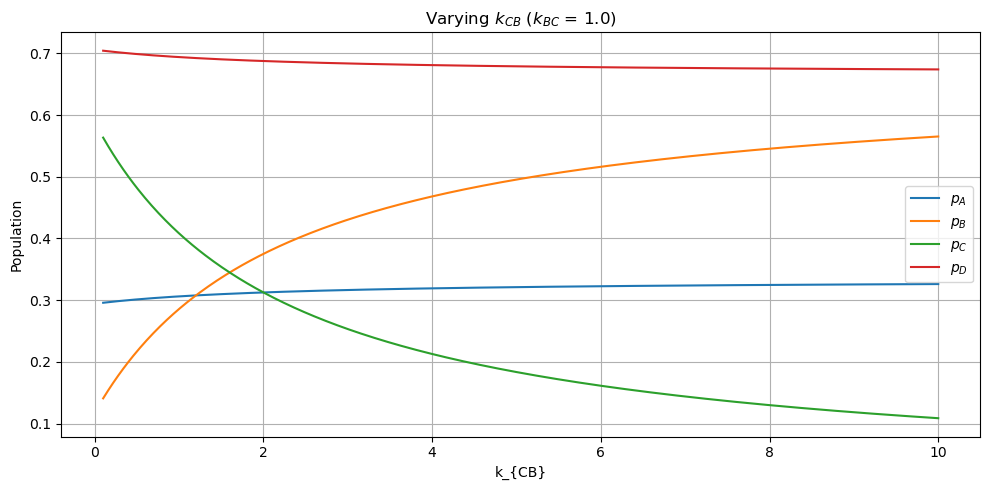

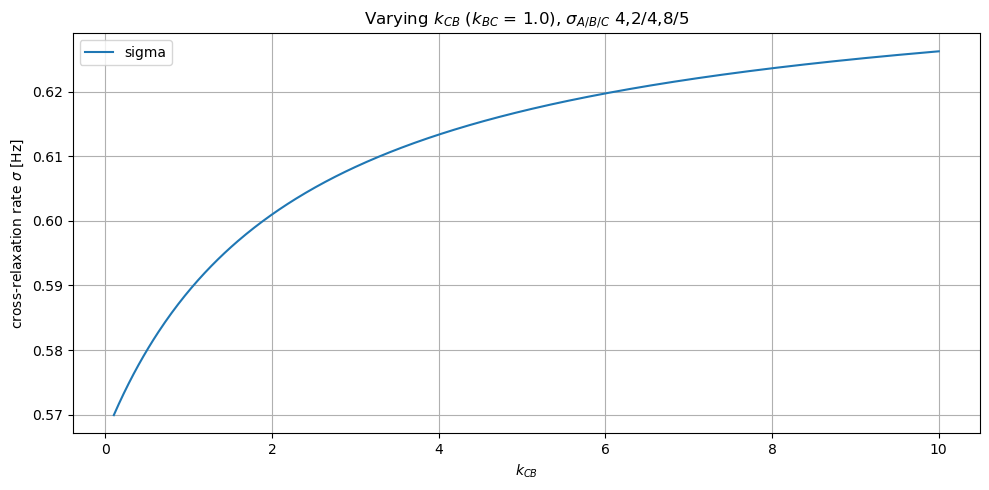

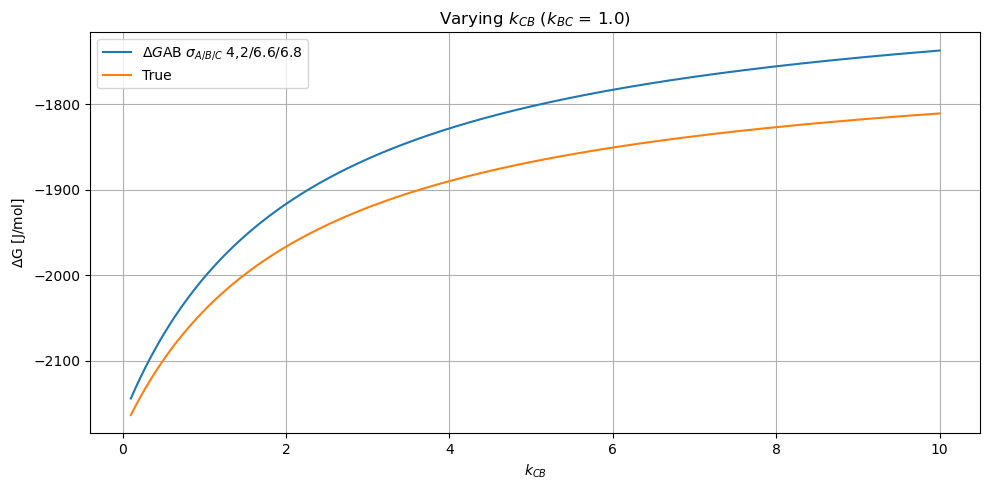

In [35]:
# Second plot: vary k_CB
# Now vary such that sigC is in the formulat for K
pA_vals, pB_vals, pC_vals = [], [], []
for k_CB in k_range:
    pA, pB, pC = compute_probs(k_BC_const, k_CB)
    pA_vals.append(pA)
    pB_vals.append(pB)
    pC_vals.append(pC)

pA_vals = np.asarray(pA_vals)
pB_vals = np.asarray(pB_vals)
pC_vals = np.asarray(pC_vals)

plt.figure(figsize=(10, 5))
plt.plot(k_range, pA_vals, label=r'$p_A$')
plt.plot(k_range, pB_vals, label=r'$p_B$')
plt.plot(k_range, pC_vals, label=r'$p_C$')
plt.plot(k_range, pC_vals+pB_vals, label=r'$p_D$')
plt.title(r'Varying $k_{CB}$ ($k_{BC}$ = 1.0)')
plt.xlabel(r'k_{CB}')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("pops_kCB.pdf", format='pdf')
plt.show()


sig_BC = sig(pA_vals,pB_vals,pC_vals, sigA, sigB, sigC)

plt.figure(figsize=(10, 5))
plt.plot(k_range, sig_BC, label='sigma')
plt.title(r'Varying $k_{CB}$ ($k_{BC}$ = 1.0), $\sigma_{A/B/C}$ 4,2/4,8/5')
plt.xlabel(r'$k_{CB}$')
plt.ylabel(r'cross-relaxation rate $\sigma$ [Hz]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sigma_v_kCB_higher_sig2.pdf", format='pdf')
plt.show()

def dG(sigA0, sigB0, sigT):
    return -8.314*300*np.log((sigA0-sigT)/(sigT-sigB0))


plt.figure(figsize=(10, 5))
plt.plot(k_range, dG(sigA, sigC, sig_BC), label=r'$\Delta G$AB $\sigma_{A/B/C}$ 4,2/6.6/6.8')
plt.plot(k_range, -8.314*300*np.log((pB_vals+pC_vals)/pA_vals), label='True')
plt.title(r'Varying $k_{CB}$ ($k_{BC}$ = 1.0)')
plt.xlabel(r'$k_{CB}$')
plt.ylabel(r'$\Delta$G [J/mol]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("dG_v_kCB_higher_sigC.pdf", format='pdf')
plt.show()